In [1]:
# Questions to answer

# 1. Which vaccine is used by most countries
# 2. In which country the vaccination programme is in full swing
# 3. Which country has most vaccinations per day, in terms of % from entire population
# 4. Highest, lowest total number of vaccinations in a country (i.e highest absolute number of immunizations in the country)
# 5. Highest, lowest number of vaccinations per day (for that day and country)
# 6. Highest vaccines used in the country (highest total number of vaccines used in the country up to data)


In [2]:
# for data
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
vaxdata_df = pd.read_csv('vaxdata.csv')

In [4]:
vaxdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14230 entries, 0 to 14229
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              14230 non-null  object 
 1   iso_code                             14230 non-null  object 
 2   date                                 14230 non-null  object 
 3   total_vaccinations                   8486 non-null   float64
 4   people_vaccinated                    7850 non-null   float64
 5   people_fully_vaccinated              5732 non-null   float64
 6   daily_vaccinations_raw               7101 non-null   float64
 7   daily_vaccinations                   14033 non-null  float64
 8   total_vaccinations_per_hundred       8486 non-null   float64
 9   people_vaccinated_per_hundred        7850 non-null   float64
 10  people_fully_vaccinated_per_hundred  5732 non-null   float64
 11  daily_vaccinations_per_milli

In [5]:
vaxdata_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [6]:
# vaxdata_df.shape

vaxdata_df_1 = vaxdata_df.groupby(['country'], as_index=True)

print(vaxdata_df.shape)
vaxdata_df_1.head()

(14230, 15)


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14161,Zimbabwe,ZWE,2021-02-18,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387135728...
14162,Zimbabwe,ZWE,2021-02-19,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387135728...
14163,Zimbabwe,ZWE,2021-02-20,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387135728...
14164,Zimbabwe,ZWE,2021-02-21,NaN,NaN,NaN,NaN,328.0,NaN,NaN,NaN,22.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1387135728...


In [7]:
vaxdata_df['date'] = pd.to_datetime(vaxdata_df.date)

In [8]:
vaccine_count = vaxdata_df['vaccines'].value_counts()

In [9]:
print(vaxdata_df['country'].value_counts())

Canada           135
Russia           134
China            134
Israel           130
United States    129
                ... 
Somalia            1
Ethiopia           1
Djibouti           1
Congo              1
Libya              1
Name: country, Length: 193, dtype: int64


In [10]:
# sns.catplot('vaccines', data=vaxdata_df, kind='count', height=20.7, aspect=11.7)

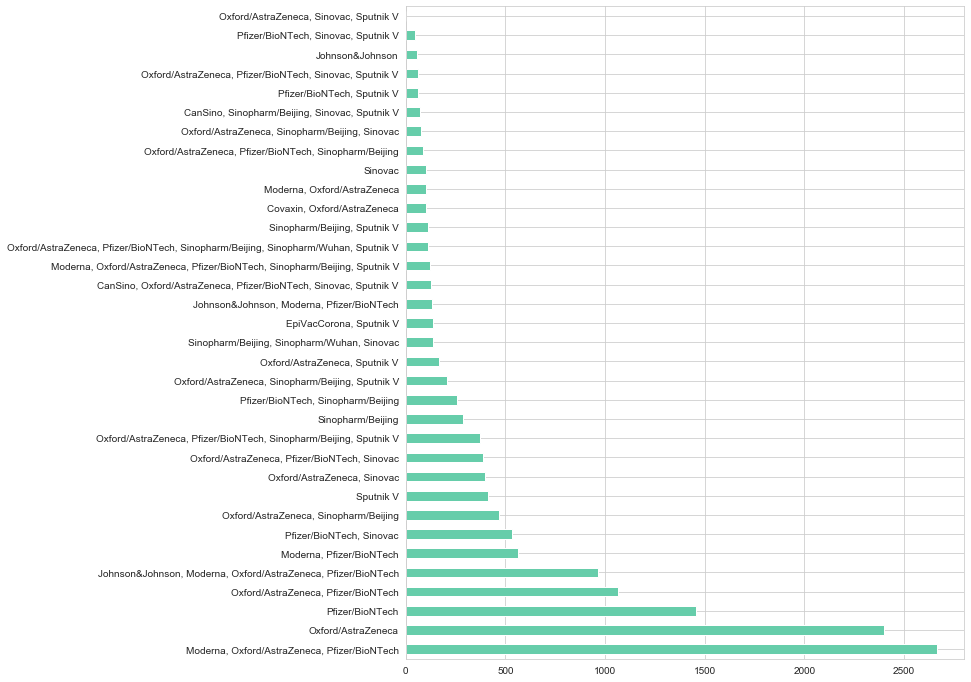

In [11]:
vaxdata_df['vaccines'].value_counts().plot(kind='barh', figsize=(10,12), color='mediumaquamarine')

In [12]:
type(vaccine_count)

pandas.core.series.Series

In [13]:
vaccine_count

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          2667
Oxford/AstraZeneca                                                                    2400
Pfizer/BioNTech                                                                       1458
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1065
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                          963
Moderna, Pfizer/BioNTech                                                               563
Pfizer/BioNTech, Sinovac                                                               533
Oxford/AstraZeneca, Sinopharm/Beijing                                                  468
Sputnik V                                                                              411
Oxford/AstraZeneca, Sinovac                                                            396
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                           388

In [14]:
vaccine_count.index[0]

'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech'

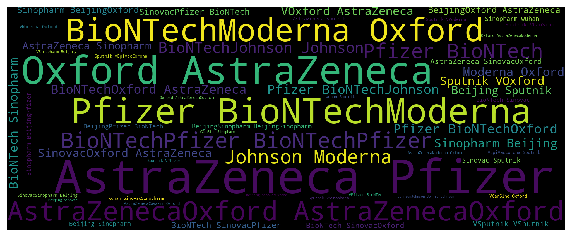

In [15]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(10, 12))
vax_names = ''.join(vaxdata_df['vaccines'])
vax = WordCloud(width = 2000, height = 800, background_color='black', min_font_size=10).generate(vax_names)
plt.imshow(vax)
plt.axis('off')
plt.show()

In [16]:
# dataframe with country and vaccine 

vaxdata_df1 = vaxdata_df[['country','vaccines']].copy()
# new = old.filter(['A','B','D'], axis=1)

# vaxdata_df1 = vaxdata_df.filter(['country', 'vaccines'], axis=1)

In [17]:
vaxdata_df1


,country,vaccines
0,Afghanistan,Oxford/AstraZeneca
1,Afghanistan,Oxford/AstraZeneca
2,Afghanistan,Oxford/AstraZeneca
3,Afghanistan,Oxford/AstraZeneca
4,Afghanistan,Oxford/AstraZeneca
...,...,...
14225,Zimbabwe,Sinopharm/Beijing
14226,Zimbabwe,Sinopharm/Beijing
14227,Zimbabwe,Sinopharm/Beijing
14228,Zimbabwe,Sinopharm/Beijing


In [18]:
vaxdata_df2 = vaxdata_df.sort_values(by='date', ascending=True)
# vaxdata_df2.plot(x='date', y=['people_fully_vaccinated', 'country'], linestyle='', marker='o', figsize=(15, 12))

In [19]:
vaxdata_df2 = vaxdata_df.fillna(0)

In [20]:
vaxdata_df2.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [21]:
v2 = vaxdata_df2.groupby('country')['people_fully_vaccinated'].sum().sort_values(ascending=False)

In [22]:
v2

country
United States                       3.725711e+09
India                               5.575871e+08
Israel                              3.582020e+08
Turkey                              3.435336e+08
United Kingdom                      3.160177e+08
                                        ...     
Ghana                               0.000000e+00
Saint Vincent and the Grenadines    0.000000e+00
Saint Lucia                         0.000000e+00
Saint Kitts and Nevis               0.000000e+00
Afghanistan                         0.000000e+00
Name: people_fully_vaccinated, Length: 193, dtype: float64

In [23]:
type(v2)

pandas.core.series.Series

In [24]:
v2[:10]

country
United States     3.725711e+09
India             5.575871e+08
Israel            3.582020e+08
Turkey            3.435336e+08
United Kingdom    3.160177e+08
Germany           2.792796e+08
Brazil            2.759712e+08
England           2.567332e+08
Italy             2.224647e+08
France            2.052408e+08
Name: people_fully_vaccinated, dtype: float64

In [25]:
v2.size  # because 193 countries

193

In [26]:
v2.shape

(193,)

In [27]:
# sns.catplot('people_fullly_vaccinated', data=v2, kind='count')

v2.index[:10]

Index(['United States', 'India', 'Israel', 'Turkey', 'United Kingdom',
       'Germany', 'Brazil', 'England', 'Italy', 'France'],
      dtype='object', name='country')

In [28]:
v2[:10]

country
United States     3.725711e+09
India             5.575871e+08
Israel            3.582020e+08
Turkey            3.435336e+08
United Kingdom    3.160177e+08
Germany           2.792796e+08
Brazil            2.759712e+08
England           2.567332e+08
Italy             2.224647e+08
France            2.052408e+08
Name: people_fully_vaccinated, dtype: float64

In [29]:
v2.iloc[:10]

country
United States     3.725711e+09
India             5.575871e+08
Israel            3.582020e+08
Turkey            3.435336e+08
United Kingdom    3.160177e+08
Germany           2.792796e+08
Brazil            2.759712e+08
England           2.567332e+08
Italy             2.224647e+08
France            2.052408e+08
Name: people_fully_vaccinated, dtype: float64

In [30]:
v2.values[:10]

array([3.72571063e+09, 5.57587061e+08, 3.58202037e+08, 3.43533576e+08,
       3.16017691e+08, 2.79279594e+08, 2.75971165e+08, 2.56733241e+08,
       2.22464744e+08, 2.05240789e+08])

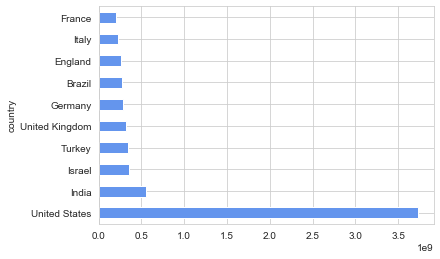

In [31]:
# countries with highest number of fully vaccinated people

v3 = v2[:10].plot(kind='barh', color='cornflowerblue')

In [32]:
v3

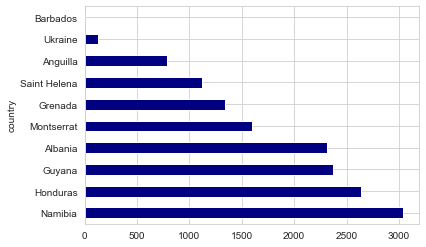

In [33]:
# countries with least number of fully vaccinated people
# the last 70 countries, according to the data collected 
# until April 27, 2021
v4 = v2[-80:-70].plot(kind='barh', color='navy' )

In [34]:
vaxdata_df['date'].max()

Timestamp('2021-04-27 00:00:00')

In [35]:
vd1 = vaxdata_df2.groupby('country')['daily_vaccinations'].max().sort_values(ascending=False)

In [36]:
vd1

country
China             5289429.0
India             3659357.0
United States     3384387.0
Brazil            1135847.0
United Kingdom     602266.0
                    ...    
Timor                   0.0
Congo                   0.0
Somalia                 0.0
Djibouti                0.0
Libya                   0.0
Name: daily_vaccinations, Length: 193, dtype: float64

In [37]:
vd1[:10]

country
China             5289429.0
India             3659357.0
United States     3384387.0
Brazil            1135847.0
United Kingdom     602266.0
Germany            533442.0
England            507875.0
Indonesia          449308.0
Turkey             435596.0
Mexico             406528.0
Name: daily_vaccinations, dtype: float64

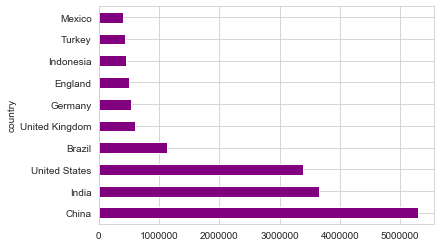

In [38]:
# highest vaccination in a day is China

vd1[:10].plot(kind='barh', color='purple')

In [39]:
vd2 = vaxdata_df2.groupby('country')['daily_vaccinations'].mean().sort_values(ascending=False)

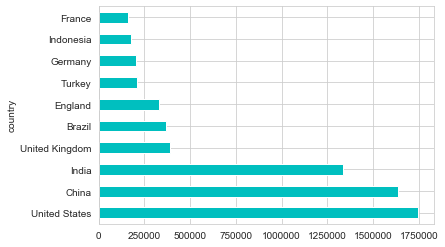

In [40]:
vd2[:10].plot.barh(color='c')

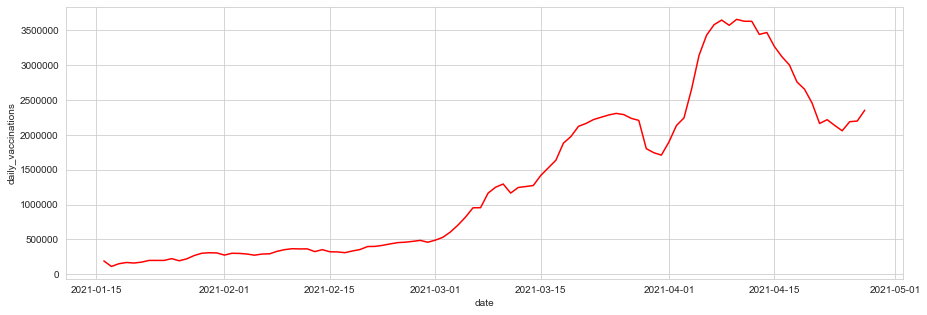

In [41]:
plt.figure(figsize=(15, 5))

sns.lineplot(x='date', y='daily_vaccinations', data=vaxdata_df[vaxdata_df['country'] == "India"], color='r')

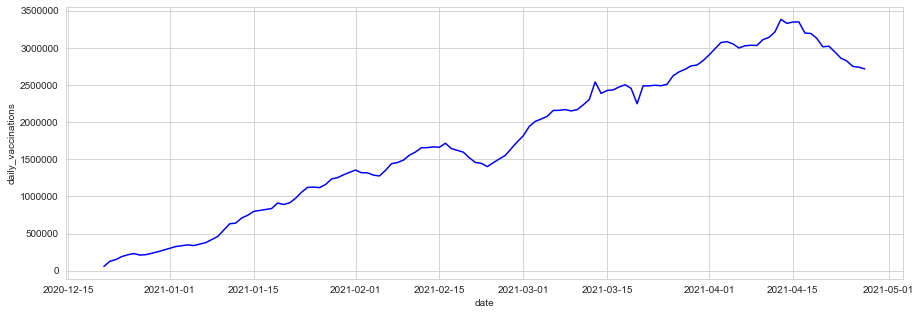

In [48]:
plt.figure(figsize=(15, 5))

sns.lineplot(x='date', y='daily_vaccinations', data=vaxdata_df[vaxdata_df['country'] == "United States"], color='b')

In [42]:
vd11 = vd1[:5]
vd11

country
China             5289429.0
India             3659357.0
United States     3384387.0
Brazil            1135847.0
United Kingdom     602266.0
Name: daily_vaccinations, dtype: float64

In [43]:
daily_vax5 = vaxdata_df.loc[(vaxdata_df['country'] == 'China' ) | (vaxdata_df['country'] == 'India') | (vaxdata_df['country'] == 'United States') | (vaxdata_df['country'] == 'Brazil') | (vaxdata_df['country'] == 'United Kingdom')]

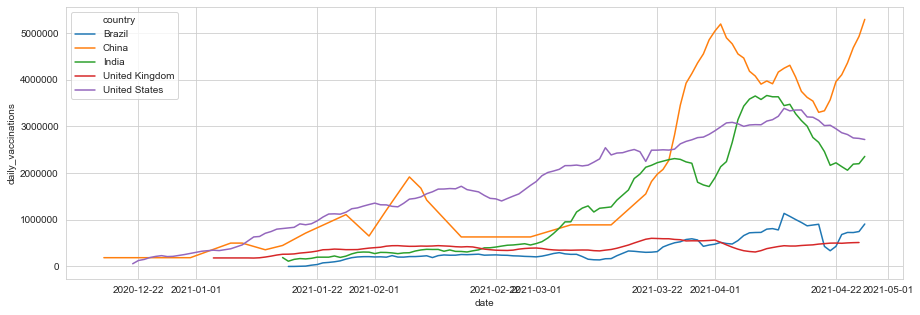

In [44]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='date', y ='daily_vaccinations', data=daily_vax5, hue='country')
plt.show()

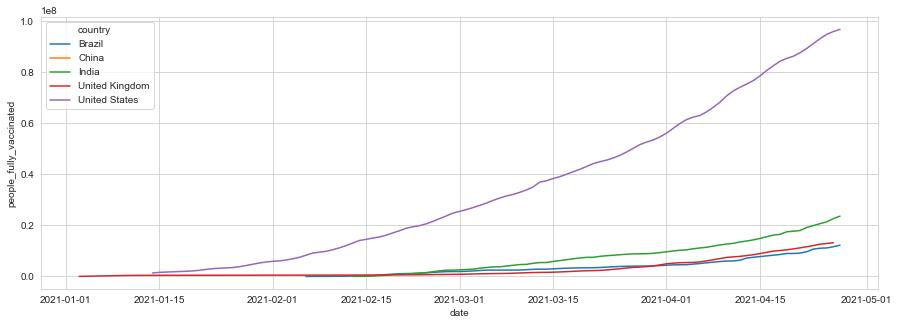

In [45]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='date', y ='people_fully_vaccinated', data=daily_vax5, hue='country')
plt.show()

In [46]:
# plt.scatter('date', 'people_fully_vaccinated', data=daily_vax5)

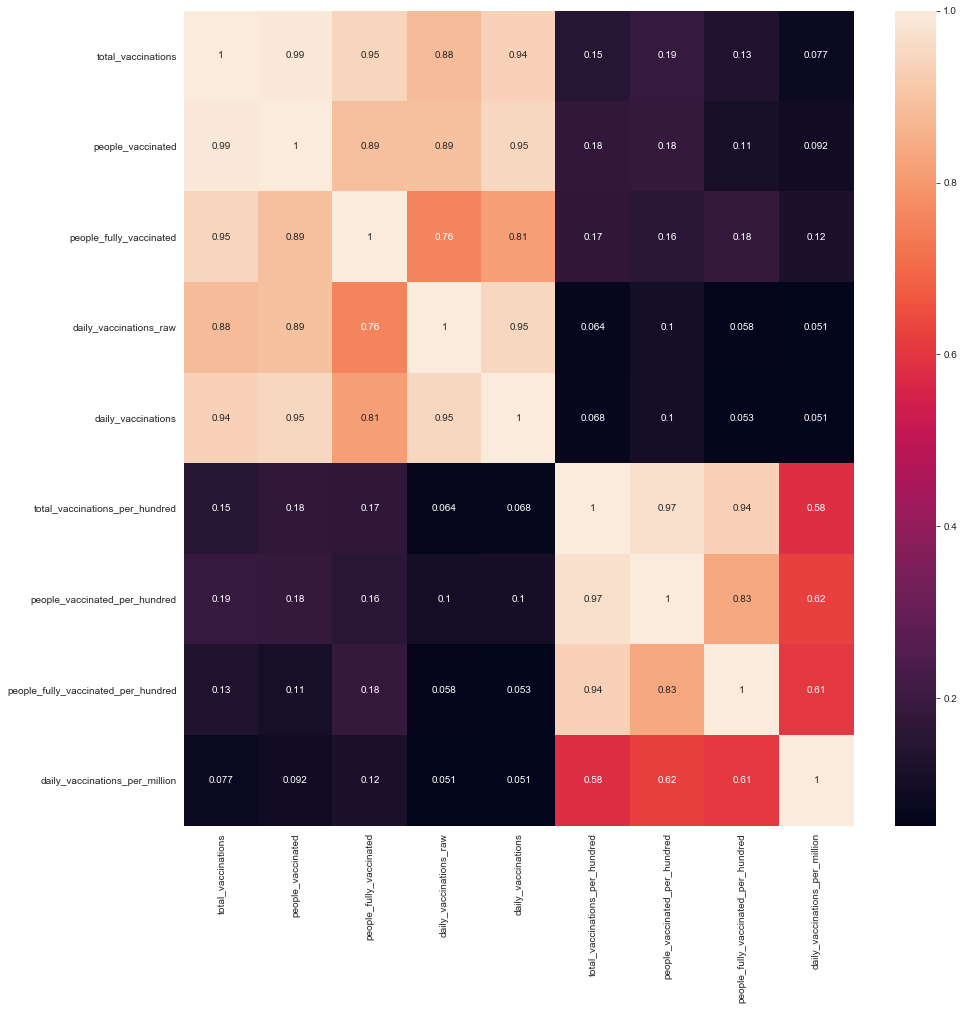

In [47]:
plt.figure(figsize=(15, 15))

sns.heatmap(vaxdata_df.corr(), annot=True)